In [122]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [123]:
evaluations = []

In [139]:
# Define fuzzy variables
def define_fuzzy_variables():
    management = ctrl.Antecedent(np.arange(0, 101, 1), 'management')
    job_specific = ctrl.Antecedent(np.arange(0, 101, 1), 'job_specific')
    personality = ctrl.Antecedent(np.arange(0, 101, 1), 'personality')
    score = ctrl.Consequent(np.arange(0, 101, 1), 'score')

    # Custom membership functions
    management['poor'] = fuzz.trimf(management.universe, [0, 0, 25])
    management['mediocre'] = fuzz.trimf(management.universe, [0, 25, 50])
    management['average'] = fuzz.trimf(management.universe, [25, 50, 75])
    management['decent'] = fuzz.trimf(management.universe, [50, 75, 100])
    management['excellent'] = fuzz.trimf(management.universe, [75, 100, 100])

    job_specific['poor'] = fuzz.trimf(job_specific.universe, [0, 0, 25])
    job_specific['mediocre'] = fuzz.trimf(job_specific.universe, [0, 25, 50])
    job_specific['average'] = fuzz.trimf(job_specific.universe, [25, 50, 75])
    job_specific['decent'] = fuzz.trimf(job_specific.universe, [50, 75, 100])
    job_specific['excellent'] = fuzz.trimf(job_specific.universe, [75, 100, 100])

    personality['poor'] = fuzz.trimf(personality.universe, [0, 0, 25])
    personality['mediocre'] = fuzz.trimf(personality.universe, [0, 25, 50])
    personality['average'] = fuzz.trimf(personality.universe, [25, 50, 75])
    personality['decent'] = fuzz.trimf(personality.universe, [50, 75, 100])
    personality['excellent'] = fuzz.trimf(personality.universe, [75, 100, 100])


    score['unsatisfactory'] = fuzz.trimf(score.universe, [0, 0, 46])
    score['satisfactory'] = fuzz.trimf(score.universe, [22.5, 46, 66.5])
    score['good'] = fuzz.trimf(score.universe, [59, 67, 80])
    score['very_good'] = fuzz.trimf(score.universe, [73, 81, 93.5])
    score['outstanding'] = fuzz.trimf(score.universe, [87, 100, 100])

    return management, job_specific, personality, score

In [148]:
def define_fuzzy_control_system(management, job_specific, personality, score):
    rule1 = ctrl.Rule(management['poor'] | job_specific['poor'] | personality['poor'], score['unsatisfactory'])
    rule2 = ctrl.Rule(management['mediocre'] | job_specific['mediocre'] | personality['mediocre'], score['satisfactory'])
    rule3 = ctrl.Rule(management['average'] | job_specific['average'] | personality['average'], score['good'])
    rule4 = ctrl.Rule(management['decent'] | job_specific['decent'] | personality['decent'], score['very_good'])
    rule5 = ctrl.Rule(management['excellent'] | job_specific['excellent'] | personality['excellent'], score['outstanding'])

    scoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
    scoring = ctrl.ControlSystemSimulation(scoring_ctrl)

    return scoring

In [149]:
    nama = "Adriano"
    A1 = 2
    A2 = 2
    A3 = 3
    A4 = 3
    B1 = 2
    B2 = 4
    B3 = 4
    B4 = 2
    B5 = 2
    B6 = 4
    B7 = 4
    B8 = 4
    C1 = 3
    C2 = 2
    C3 = 2
    C4 = 2


In [150]:
    # Define the sub weights
    sub_weights_A = [0.21, 0.21, 0.29, 0.29]
    sub_weights_B = [0.09, 0.146, 0.146, 0.09, 0.09, 0.146, 0.146, 0.146]
    sub_weights_C = [0.31, 0.23, 0.23, 0.23]


In [151]:
    # Calculate degrees
    def calculate_degree(value, min_val, max_val):
        return (value - min_val) / (max_val - min_val)

    degrees_A = [round(calculate_degree(A1, 1, 3), 2), round(calculate_degree(A2, 1, 3), 2),
                 round(calculate_degree(A3, 1, 4), 2), round(calculate_degree(A4, 1, 4), 2)]
    degrees_B = [round(calculate_degree(B1, 1, 3), 2), round(calculate_degree(B2, 1, 5), 2),
                 round(calculate_degree(B3, 1, 5), 2), round(calculate_degree(B4, 1, 3), 2),
                 round(calculate_degree(B5, 1, 3), 2), round(calculate_degree(B6, 1, 5), 2),
                 round(calculate_degree(B7, 1, 5), 2), round(calculate_degree(B8, 1, 5), 2)]

    degrees_C = [round(calculate_degree(C1, 1, 4), 2), round(calculate_degree(C2, 1, 3), 2),
                 round(calculate_degree(C3, 1, 3), 2), round(calculate_degree(C4, 1, 3), 2)]


    # Calculate criteria totals
    total_A = sum(degree * weight for degree, weight in zip(degrees_A, sub_weights_A))
    total_B = sum(degree * weight for degree, weight in zip(degrees_B, sub_weights_B))
    total_C = sum(degree * weight for degree, weight in zip(degrees_C, sub_weights_C))

    print(degrees_A)
    print(degrees_B)
    print(degrees_C)
    print(total_A)
    print(total_B)
    print(total_C)

[0.5, 0.5, 0.67, 0.67]
[0.5, 0.75, 0.75, 0.5, 0.5, 0.75, 0.75, 0.75]
[0.67, 0.5, 0.5, 0.5]
0.5986
0.6824999999999999
0.5527000000000001


In [152]:
    # Define the criteria weights
    weight_A = 0.23
    weight_B = 0.56
    weight_C = 0.21

    # Normalize totals to a 0-10 scale for fuzzy logic
    total_A_normalized = round(total_A * 100, 2)
    total_B_normalized = round(total_B * 100, 2)
    total_C_normalized = round(total_C * 100, 2)

    weight_A = total_A_normalized * weight_A
    weight_B = total_B_normalized * weight_B
    weight_C = total_C_normalized * weight_C

    weight_A = round(weight_A, 2)
    weight_B = round(weight_B, 2)
    weight_C = round(weight_C, 2)

    total_score = round((weight_A + weight_B + weight_C),2)

    print(total_A_normalized)
    print(total_B_normalized)
    print(total_C_normalized)

    print(weight_A)
    print(weight_B)
    print(weight_C)

    print(total_score)

59.86
68.25
55.27
13.77
38.22
11.61
63.6


In [174]:
    # Define fuzzy variables and control system
    management, job_specific, personality, score = define_fuzzy_variables()
    scoring = define_fuzzy_control_system(management, job_specific, personality, score)
    # Pass inputs to the ControlSystem using Antecedent labels
    scoring.input['management'] = total_A_normalized
    scoring.input['job_specific'] = total_B_normalized
    scoring.input['personality'] = total_C_normalized

In [175]:
    scoring.compute()

    # Get the score and determine the predikat based on memberships
    # total_score = scoring.output['score']

In [177]:
    print("Score output:", scoring.output['score'])

Score output: 75.43089505370004


In [178]:
    final_score = total_score

    print(final_score)

63.6


In [156]:
    # Get membership values for score
    score_membership = {
        'unsatisfactory': fuzz.interp_membership(score.universe, score['unsatisfactory'].mf, final_score),
        'satisfactory': fuzz.interp_membership(score.universe, score['satisfactory'].mf, final_score),
        'good': fuzz.interp_membership(score.universe, score['good'].mf, final_score),
        'very_good': fuzz.interp_membership(score.universe, score['very_good'].mf, final_score),
        'outstanding': fuzz.interp_membership(score.universe, score['outstanding'].mf, final_score)
    }

In [157]:
    # Determine the predikat
    predikat = []
    for label, membership_value in score_membership.items():
        if membership_value > 0:
            predikat.append(label.replace('_', ' ').title())

    predikat = ' - '.join(predikat)

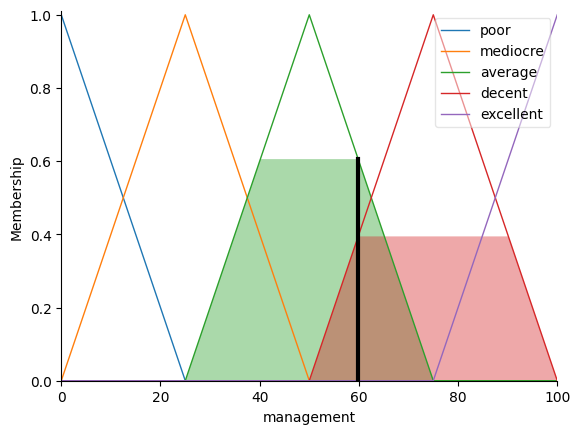

In [158]:
management.view(sim=scoring)

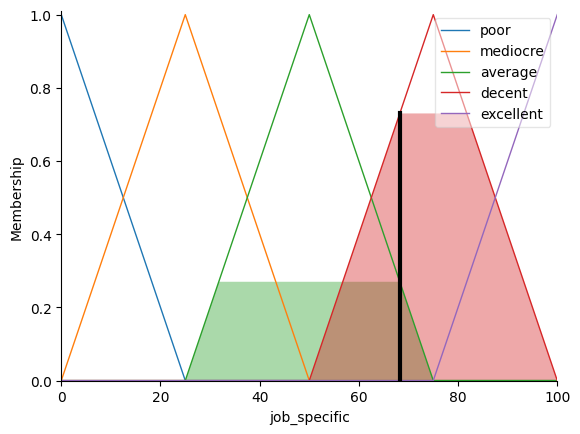

In [159]:
job_specific.view(sim=scoring)

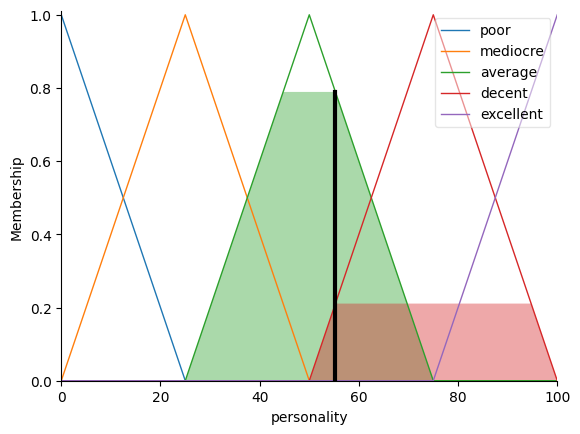

In [160]:
personality.view(sim=scoring)

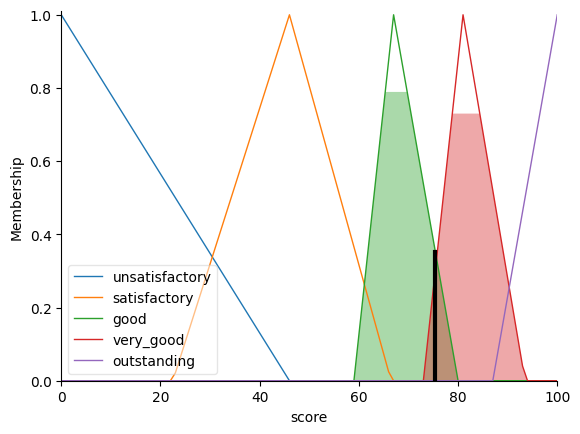

In [161]:
score.view(sim=scoring)

In [ ]:
print(weight_A)
print(weight_B)
print(weight_C)
print(total_score)
predikat